In [1]:
import numpy as np
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


import metpy.calc as mpcalc
from metpy.units import units
from datetime import datetime
from datetime import timedelta

# extra packages
import pytz
import eccodes
import cfgrib

In [2]:
def preprocess(ds):
    '''turns time coordinate into a dimension'''
    return ds.expand_dims(dim = 'time')

In [3]:
case = 1

if (case == 0):
    # specify case study name
    casename = 'interesting_day_2_2014'
    casetitle = 'Interesting Day 2 5/12/14 - 5/16/14'
    
    # set output filepath
    outdir = '/home/sbarc/students/coello/repos/research/chapter_one/era_data/outputs/' + casename + '/'
    
elif (case == 1):
    # specify case study name
    casename = 'project_case_study'
    casetitle = ''

    # set output filepath
    outdir = '/home/sbarc/students/coello/repos/classes/spring_2021/geog_288cj/era_data/outputs/' + casename + '/'

### Open Surface ERA

In [36]:
# set input data filepaths
datadir = '/home/discovery-reanalysis/interim/sfc/'

# set file names
filename = ['ei.oper.an.sfc.regn128sc.2017052200', 'ei.oper.an.sfc.regn128sc.2017052206',
            'ei.oper.an.sfc.regn128sc.2017052212', 'ei.oper.an.sfc.regn128sc.2017052218',
            'ei.oper.an.sfc.regn128sc.2017052300', 'ei.oper.an.sfc.regn128sc.2017052306',
            'ei.oper.an.sfc.regn128sc.2017052312', 'ei.oper.an.sfc.regn128sc.2017052318',
            'ei.oper.an.sfc.regn128sc.2017052400', 'ei.oper.an.sfc.regn128sc.2017052406',
            'ei.oper.an.sfc.regn128sc.2017052412', 'ei.oper.an.sfc.regn128sc.2017052418',
            'ei.oper.an.sfc.regn128sc.2017052500', 'ei.oper.an.sfc.regn128sc.2017052506',
            'ei.oper.an.sfc.regn128sc.2017052512']

# append filename to datadir
filepath = [datadir + filename[i] for i in range (len(filename))]

# open grib era files using xarray and cfgrib engine
ds_sfc = xr.open_mfdataset(filepath, engine='cfgrib', preprocess=preprocess, concat_dim = 'time', \
                           backend_kwargs={'indexpath':'', 'filter_by_keys' :{'typeOfLevel': 'surface'}})

print('Opened Files:')
for i in range (len(filename)): print(filepath[i])

Opened Files:
/home/discovery-reanalysis/interim/sfc/ei.oper.an.sfc.regn128sc.2017052200
/home/discovery-reanalysis/interim/sfc/ei.oper.an.sfc.regn128sc.2017052206
/home/discovery-reanalysis/interim/sfc/ei.oper.an.sfc.regn128sc.2017052212
/home/discovery-reanalysis/interim/sfc/ei.oper.an.sfc.regn128sc.2017052218
/home/discovery-reanalysis/interim/sfc/ei.oper.an.sfc.regn128sc.2017052300
/home/discovery-reanalysis/interim/sfc/ei.oper.an.sfc.regn128sc.2017052306
/home/discovery-reanalysis/interim/sfc/ei.oper.an.sfc.regn128sc.2017052312
/home/discovery-reanalysis/interim/sfc/ei.oper.an.sfc.regn128sc.2017052318
/home/discovery-reanalysis/interim/sfc/ei.oper.an.sfc.regn128sc.2017052400
/home/discovery-reanalysis/interim/sfc/ei.oper.an.sfc.regn128sc.2017052406
/home/discovery-reanalysis/interim/sfc/ei.oper.an.sfc.regn128sc.2017052412
/home/discovery-reanalysis/interim/sfc/ei.oper.an.sfc.regn128sc.2017052418
/home/discovery-reanalysis/interim/sfc/ei.oper.an.sfc.regn128sc.2017052500
/home/disco

### Open 3D sc ERA

In [6]:
# set input data filepaths
datadir = '/home/discovery-reanalysis/interim/prs1/'

# set file names
filename = ['ei.oper.an.pl.regn128sc.2017052200', 'ei.oper.an.pl.regn128sc.2017052206',
            'ei.oper.an.pl.regn128sc.2017052212', 'ei.oper.an.pl.regn128sc.2017052218',
            'ei.oper.an.pl.regn128sc.2017052300', 'ei.oper.an.pl.regn128sc.2017052306',
            'ei.oper.an.pl.regn128sc.2017052312', 'ei.oper.an.pl.regn128sc.2017052318',
            'ei.oper.an.pl.regn128sc.2017052400', 'ei.oper.an.pl.regn128sc.2017052406',
            'ei.oper.an.pl.regn128sc.2017052412', 'ei.oper.an.pl.regn128sc.2017052418',
            'ei.oper.an.pl.regn128sc.2017052500', 'ei.oper.an.pl.regn128sc.2017052506',
            'ei.oper.an.pl.regn128sc.2017052512',]

# append filename to datadir
filepath = [datadir + filename[i] for i in range (len(filename))]

# open grib era files using xarray and cfgrib engine
ds_pl = xr.open_mfdataset(filepath, engine='cfgrib', preprocess=preprocess, concat_dim = 'time',\
                         backend_kwargs={'indexpath':''})

print('Opened Files:')
for i in range (len(filename)): print(filepath[i])

Opened Files:
/home/discovery-reanalysis/interim/prs1/ei.oper.an.pl.regn128sc.2017052200
/home/discovery-reanalysis/interim/prs1/ei.oper.an.pl.regn128sc.2017052206
/home/discovery-reanalysis/interim/prs1/ei.oper.an.pl.regn128sc.2017052212
/home/discovery-reanalysis/interim/prs1/ei.oper.an.pl.regn128sc.2017052218
/home/discovery-reanalysis/interim/prs1/ei.oper.an.pl.regn128sc.2017052300
/home/discovery-reanalysis/interim/prs1/ei.oper.an.pl.regn128sc.2017052306
/home/discovery-reanalysis/interim/prs1/ei.oper.an.pl.regn128sc.2017052312
/home/discovery-reanalysis/interim/prs1/ei.oper.an.pl.regn128sc.2017052318
/home/discovery-reanalysis/interim/prs1/ei.oper.an.pl.regn128sc.2017052400
/home/discovery-reanalysis/interim/prs1/ei.oper.an.pl.regn128sc.2017052406
/home/discovery-reanalysis/interim/prs1/ei.oper.an.pl.regn128sc.2017052412
/home/discovery-reanalysis/interim/prs1/ei.oper.an.pl.regn128sc.2017052418
/home/discovery-reanalysis/interim/prs1/ei.oper.an.pl.regn128sc.2017052500
/home/disco

### Open 3D uv ERA

In [7]:
# set input data filepaths
datadir = '/home/discovery-reanalysis/interim/prs1/'

# set file names
filename = ['ei.oper.an.pl.regn128uv.2017052200', 'ei.oper.an.pl.regn128uv.2017052206',
            'ei.oper.an.pl.regn128uv.2017052212', 'ei.oper.an.pl.regn128uv.2017052218',
            'ei.oper.an.pl.regn128uv.2017052300', 'ei.oper.an.pl.regn128uv.2017052306',
            'ei.oper.an.pl.regn128uv.2017052312', 'ei.oper.an.pl.regn128uv.2017052318',
            'ei.oper.an.pl.regn128uv.2017052400', 'ei.oper.an.pl.regn128uv.2017052406',
            'ei.oper.an.pl.regn128uv.2017052412', 'ei.oper.an.pl.regn128uv.2017052418',
            'ei.oper.an.pl.regn128uv.2017052500', 'ei.oper.an.pl.regn128uv.2017052506',
            'ei.oper.an.pl.regn128uv.2017052512', ]

# append filename to datadir
filepath = [datadir + filename[i] for i in range (len(filename))]

# open grib era files using xarray and cfgrib engine
ds_uv = xr.open_mfdataset(filepath, engine='cfgrib', preprocess=preprocess, concat_dim = 'time',\
                          backend_kwargs={'indexpath':''})

print('Opened Files:')
for i in range (len(filename)): print(filepath[i])

Opened Files:
/home/discovery-reanalysis/interim/prs1/ei.oper.an.pl.regn128uv.2017052200
/home/discovery-reanalysis/interim/prs1/ei.oper.an.pl.regn128uv.2017052206
/home/discovery-reanalysis/interim/prs1/ei.oper.an.pl.regn128uv.2017052212
/home/discovery-reanalysis/interim/prs1/ei.oper.an.pl.regn128uv.2017052218
/home/discovery-reanalysis/interim/prs1/ei.oper.an.pl.regn128uv.2017052300
/home/discovery-reanalysis/interim/prs1/ei.oper.an.pl.regn128uv.2017052306
/home/discovery-reanalysis/interim/prs1/ei.oper.an.pl.regn128uv.2017052312
/home/discovery-reanalysis/interim/prs1/ei.oper.an.pl.regn128uv.2017052318
/home/discovery-reanalysis/interim/prs1/ei.oper.an.pl.regn128uv.2017052400
/home/discovery-reanalysis/interim/prs1/ei.oper.an.pl.regn128uv.2017052406
/home/discovery-reanalysis/interim/prs1/ei.oper.an.pl.regn128uv.2017052412
/home/discovery-reanalysis/interim/prs1/ei.oper.an.pl.regn128uv.2017052418
/home/discovery-reanalysis/interim/prs1/ei.oper.an.pl.regn128uv.2017052500
/home/disco

In [16]:
# save time variable
time = ds_sfc.time.values

# save times as datetimes
dates = []

# store dates as a datetine and convert it to PDT timezone
for i in range(len(time)):
    dates_obj = datetime.strptime(str(time[i]), '%Y-%m-%dT%H:%M:%S.000000000')
    dates_obj_zone = dates_obj.replace(tzinfo =  pytz.timezone('UTC'))
    dates_obj_PDT = dates_obj_zone.astimezone(pytz.timezone('US/Pacific'))
    datetime64_PDT = np.datetime64(str(dates_obj_PDT)[:16]).astype(datetime)
    dates.append(datetime64_PDT)

In [37]:
# save PDT dates as xarray time coordinate
ds_sfc = ds_sfc.assign_coords(time = dates)
ds_pl = ds_pl.assign_coords(time = dates)
ds_uv = ds_uv.assign_coords(time = dates)

In [38]:
days = []

# drop hours and append
for i in range(len(dates)):    
    days.append(datetime.strptime(str(dates[i]), '%Y-%m-%d %H:%M:%S').date())

# find unique days
unq_days = np.unique(days)

In [39]:
# group into days and take average
ds_sfc_days = ds_sfc.groupby('time.day').mean()
ds_pl_days = ds_pl.groupby('time.day').mean()
ds_uv_days = ds_uv.groupby('time.day').mean()

# change new day coordinate from last step to have the name time
ds_sfc_days = ds_sfc_days.rename(day = 'time')
ds_pl_days = ds_pl_days.rename(day = 'time')
ds_uv_days = ds_uv_days.rename(day = 'time')

# save over the stored day info with the DMY datetime info
ds_sfc_days = ds_sfc_days.assign_coords(time = unq_days)
ds_pl_days = ds_pl_days.assign_coords(time = unq_days)
ds_uv_days = ds_uv_days.assign_coords(time = unq_days)

In [40]:
# specify bounds for plot
bounds = [-150, -100, 20, 60]

# trim dataset by bounds
ds_sfc_trim = ds_sfc_days.sel(latitude = slice(bounds[3] + 1, bounds[2] - 1), \
                         longitude = slice(360 + bounds[0] - 1, 360 + bounds[1] + 1))
ds_pl_trim = ds_pl_days.sel(latitude = slice(bounds[3] + 1, bounds[2] - 1), \
                       longitude = slice(360 + bounds[0] - 1, 360 + bounds[1] + 1))
ds_uv_trim = ds_uv_days.sel(latitude = slice(bounds[3] + 1, bounds[2] - 1), \
                       longitude = slice(360 + bounds[0] - 1, 360 + bounds[1] + 1))

# convert mean sea level pressure from Pa to mbar
ds_sfc_trim.msl.values = ds_sfc_trim.msl.values * 0.01

# convert geopotential to geopotential height 
ds_pl_trim.z.values = ds_pl_trim.z.values / 9.80665

# calculate wind speed
wnd_spd_sf = mpcalc.wind_speed(ds_sfc_trim.u10.values * units('m/s'), ds_sfc_trim.v10.values * units('m/s'))
wnd_spd_uv = mpcalc.wind_speed(ds_uv_trim.u.values * units('m/s'), ds_uv_trim.v.values * units('m/s'))

# add calculate wind speeds to datasets
ds_sfc_trim['wnd_spd'] = (['time', 'latitude', 'longitude'], wnd_spd_sf)
ds_uv_trim['wnd_spd'] = (['time', 'isobaricInhPa', 'latitude', 'longitude'], wnd_spd_uv) 

In [42]:
# set levels
levels_geo = np.arange(5300, 5950, 50) 
levels_msl = np.arange(990, 1040, 4)
levels_wnd = np.arange(0, 16, 1)

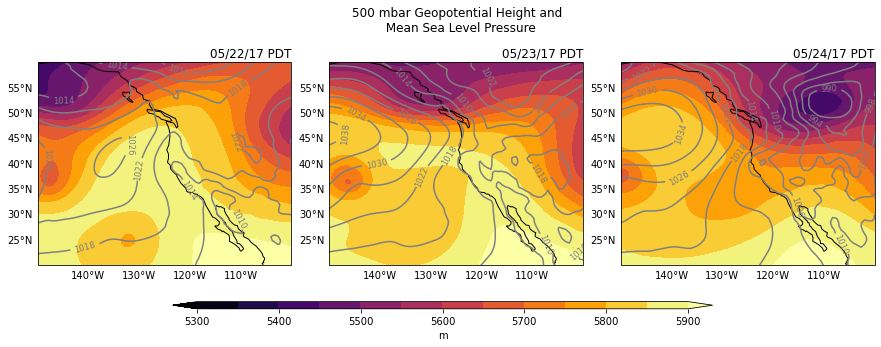

File saved as: /home/sbarc/students/coello/repos/classes/spring_2021/geog_288cj/era_data/outputs/project_case_study/geo_500_n_msl_2017-05-22_to_2017-05-24.png 



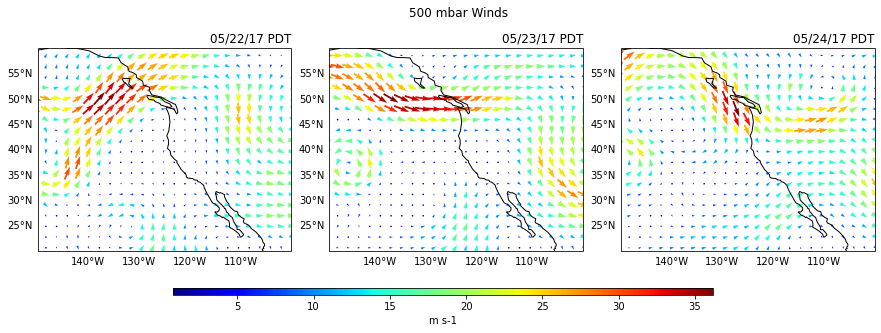

File saved as: /home/sbarc/students/coello/repos/classes/spring_2021/geog_288cj/era_data/outputs/project_case_study/winds_500_2017-05-22_to_2017-05-24.png 



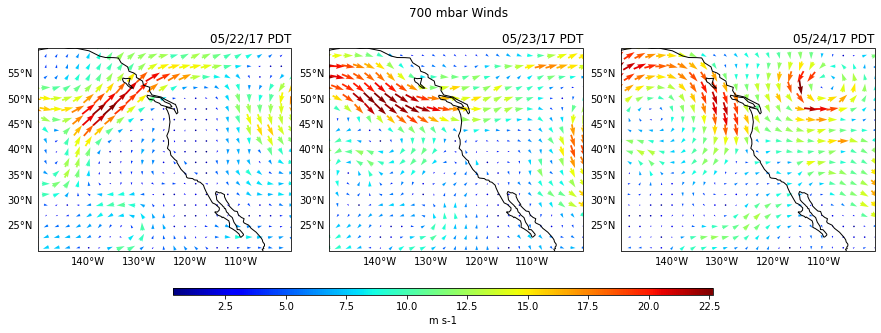

File saved as: /home/sbarc/students/coello/repos/classes/spring_2021/geog_288cj/era_data/outputs/project_case_study/winds_700_2017-05-22_to_2017-05-24.png 



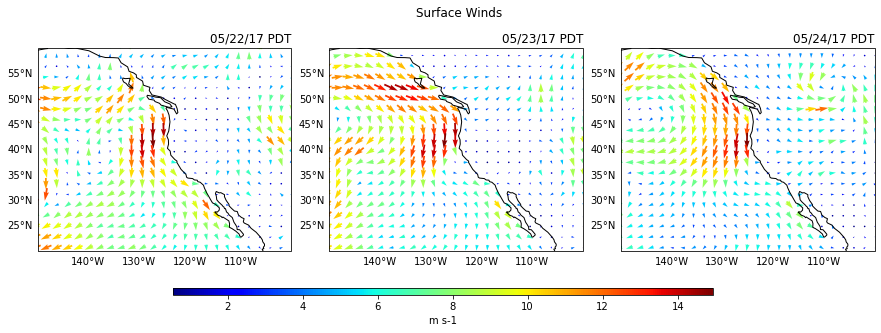

File saved as: /home/sbarc/students/coello/repos/classes/spring_2021/geog_288cj/era_data/outputs/project_case_study/sfc_winds_2017-05-22_to_2017-05-24.png 



In [43]:
def era_subplots(sfc_data, var, pl_data, level, data_cols, levels_gp, levels_data, data_units, des_hours, ncols, nrows, width, \
                        height, bounds, spaces, title_y, cbar_bounds, labels, data_name, data_titles, outdir):
    '''
    
    This program outputs and saves a figure of subplots at ground surface or any pressure surface with:
        - geopotential heights as contours and any desired variable a colormap
        - or wind speeds as colors quivers
    
    sfc_data = xarray of surface era data
    var = string with variable name desired to plot 
    pl_data = xarray of 3D era data 
    level = indicated of level desired to look
        either string that saying "Surface" or a number value for mbar pressure surface to look at
    data_cols = string of cmap desired
    levels_gp = array of desired levels for geopotential height 
    levels_data = array of desired levels for desired data
    data_units = string of units for labeling 
    des_hours = list of hours desired to plot
    ncols = number of columns for plot of subplots 
    nrows = number of rows for plot of subplots
    width = width of entire plot
    height = height of entire plot
    bounds = extend of map
    spaces = [width between subplots, height between subplots]
    title_y = position of title in the y direction
    cbar_bounds = axes boundaries of colorbar
    labels = list strings of subplot levels in top left corner
    data_name = string of the desired data for filename
    data_titles = string of title of desired data
    outdir = output directory for saving
    '''
    
    # pull lat and lon
    lats = pl_data.latitude
    lons = pl_data.longitude
    
    # set map projection
    mapcrs = ccrs.PlateCarree() # mapcrs - what want in
    datacrs = ccrs.PlateCarree() # datacrs - what comes in
    
    # create figure
    fig = plt.figure(figsize = (width, height))
    gs = plt.GridSpec(nrows, ncols, figure = fig, hspace = spaces[0], wspace = spaces[1])
    
    
    # loop through each subplot 
    d = 0

    for r in range(nrows):
        
        for c in range(ncols):

            # add plot axes 
            ax = fig.add_subplot(gs[r,c], projection=mapcrs)

            # set plot boundaries
            ax.set_extent(bounds, crs=mapcrs)
    
            # add map features
            ax.add_feature(cfeature.NaturalEarthFeature(category='physical', scale='110m',
                            facecolor='none', name='coastline'), edgecolor='black')
            
            # if its a wind plot, add quivers
            if (var == 'wind'):
                
                if (level == 'Surface'):
                
                    cf = ax.quiver(lons[::3], lats[::3], sfc_data['u10'].sel(time = \
                                sfc_data.time.values[des_hours[d]])[::3, ::3], \
                              sfc_data['v10'].sel(time = sfc_data.time.values[des_hours[d]])[::3, ::3],  \
                              sfc_data['wnd_spd'].sel(time = sfc_data.time.values[des_hours[d]])[::3, ::3], \
                              transform=datacrs, cmap = data_cols, pivot = 'middle', width = 0.007)
                
                else:
                    
                    cf = ax.quiver(lons[::3], lats[::3], np.array(pl_data['u'].sel(time = \
                                pl_data.time.values[des_hours[d]], isobaricInhPa = level).values)[::3, ::3], \
                              np.array(pl_data['v'].sel(time = pl_data.time.values[des_hours[d]], 
                                isobaricInhPa = level).values)[::3, ::3],  \
                              np.array(pl_data['wnd_spd'].sel(time = pl_data.time.values[des_hours[d]], 
                                isobaricInhPa = level).values)[::3, ::3], \
                              transform=datacrs, cmap = data_cols, pivot = 'middle', width = 0.007)
            
            # if its not a wind plot, plot geopotential height along with whatever specified data as contours
            else:
            
                # plot geopotential height as colormap
                cf = ax.contourf(lons, lats, np.array(pl_data['z'].sel(time = pl_data.time.values[des_hours[d]], 
                                isobaricInhPa = level).values), \
                                 transform = datacrs, cmap = data_cols, \
                                 extend = 'both', levels = levels_gp)

                # plot specified data as contours
                data_contours = ax.contour(lons, lats, np.array(sfc_data[var].sel(time = \
                                sfc_data.time.values[des_hours[d]]).values), \
                                 transform = datacrs, colors = 'gray', \
                                 extend = 'both', levels = levels_data)
            
                plt.clabel(data_contours, fmt='%d',fontsize=8.5, inline_spacing=5, inline = 1) 

            
            # subtitles
            ax.set_title("{:%m/%d/%y PDT}".format(pl_data.time.values[des_hours[d]]), loc = 'right')
            ax.set_title(labels[d], loc = 'left')
    
                
            d = d + 1
            
            # Add lat lon labels
            gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                              linewidth=2, color='gray', alpha=0.5, linestyle='--')
            gl.top_labels = False
            gl.right_labels = False
            gl.xlines = False
            gl.ylines = False
            gl.xformatter = LONGITUDE_FORMATTER
            gl.yformatter = LATITUDE_FORMATTER
            
    
    # make seperate colorbar at the bottom
    ax2 = fig.add_axes(cbar_bounds)
    cb = plt.colorbar(cf, cax = ax2, orientation = 'horizontal', shrink = 0.8, pad = 0.05, label = data_units)
    
    # add title for all of subplots
    fig.suptitle(data_titles, fontsize = 12, x = 0.515, y = title_y)
    
    # Display figure
    # save file name as start datetime end datetime and variable
    plot_name = data_name + '_' + str(sfc_data.time.values[des_hours[0]]) + '_to_' + \
                str(sfc_data.time.values[des_hours[-1]]) +  '.png'

    plt.savefig(outdir+plot_name,  bbox_inches='tight', dpi = 120, transparent = False)
    plt.show()
    print('File saved as:', outdir+plot_name, '\n')
    

era_subplots(ds_sfc_trim, 'msl', ds_pl_trim, 500, 'inferno', levels_geo, levels_msl, 'm', \
             [1, 2, 3], 3, 1, 15, 5, bounds, [0.1, 0.15], 0.94, [0.25, 0.1, 0.5, 0.02], \
             ['', '', ''], 'geo_500_n_msl', \
             '500 mbar Geopotential Height and \n Mean Sea Level Pressure', outdir)

era_subplots(ds_sfc_trim, 'wind', ds_uv_trim, 500, 'jet', levels_geo, levels_wnd, 'm s-1', \
             [1, 2, 3], 3, 1, 15, 5, bounds, [0.15, 0.15], 0.9, [0.25, 0.1, 0.5, 0.02], \
             ['', '', ''], 'winds_500', '500 mbar Winds', outdir)

era_subplots(ds_sfc_trim, 'wind', ds_uv_trim, 700, 'jet', levels_geo, levels_wnd, 'm s-1', \
             [1, 2, 3], 3, 1, 15, 5, bounds, [0.15, 0.15], 0.9, [0.25, 0.1, 0.5, 0.02], \
             ['', '', ''], 'winds_700', '700 mbar Winds', outdir)

era_subplots(ds_sfc_trim, 'wind', ds_pl_trim, 'Surface', 'jet', levels_geo, levels_wnd, 'm s-1', \
             [1, 2, 3], 3, 1, 15, 5, bounds, [0.15, 0.15], 0.9, [0.25, 0.1, 0.5, 0.02], \
              ['', '', ''],  'sfc_winds', 'Surface Winds', outdir)

